In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(display="text")

In [2]:
cols_csv = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'body',]
df = pd.read_csv("titanic3.csv",
                 index_col=False,
                 usecols=cols_csv)
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body
972,3,0,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,S,NaN
776,3,0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q,NaN
1119,3,0,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,S,NaN
1277,3,1,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,C,NaN
554,2,0,"Schmidt, Mr. August",male,26.0,0,0,248659,13.0000,S,NaN


In [3]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
embarked       2
body        1188
dtype: int64

In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['body'].fillna(df['body'].mean(),inplace=True)
df['embarked'].fillna(method='ffill',inplace=True)
df['fare'].fillna(method='ffill',inplace=True)

In [6]:
df['enc_sex'] = LabelEncoder().fit_transform(df['sex'])
df['enc_embarked'] = LabelEncoder().fit_transform(df['embarked'])

In [7]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body,enc_sex,enc_embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,160.809917,0,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,160.809917,1,2
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,160.809917,0,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,135.000000,1,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,160.809917,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,328.000000,0,0
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,160.809917,0,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,304.000000,1,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,160.809917,1,0


In [8]:
X = df[['pclass', 'enc_sex', 'age', 'sibsp', 'parch','fare', 'enc_embarked', 'body',]]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=0)

In [13]:
steps  = [
    ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
    ('pca', PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
    ('clf', LogisticRegression()) 
                ]
pipe_lr = Pipeline(steps,verbose=True)
pipe_lr.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing clf, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('clf', LogisticRegression())],
         verbose=True)

<Axes: >

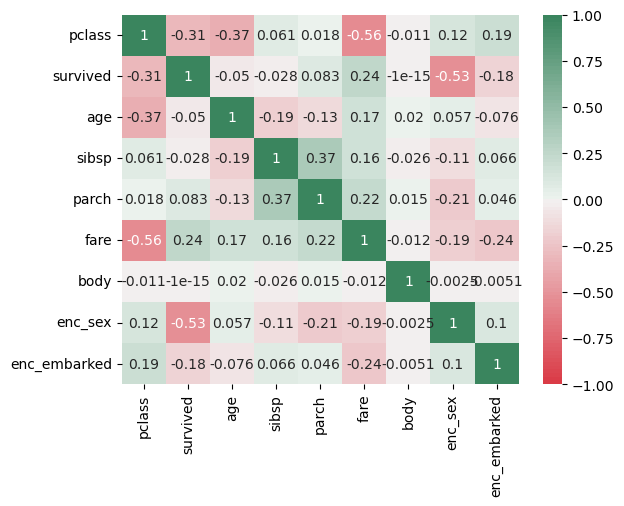

In [ ]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,
            cmap=sns.diverging_palette(10,145,n=100))

TEST:


<Axes: >

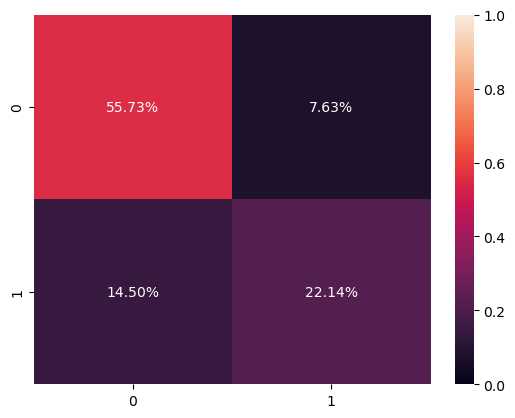

In [ ]:
from sklearn import metrics
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TEST:")
conf_matrix= metrics.confusion_matrix(y_test, test_predictions)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%',vmin=0,vmax=1)

In [ ]:
pipe_lr.score(X_test,y_test )

0.7786259541984732

In [ ]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body,enc_sex,enc_embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,160.809917,0,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,160.809917,1,2
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,160.809917,0,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,135.000000,1,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,160.809917,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,328.000000,0,0
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,160.809917,0,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,304.000000,1,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,160.809917,1,0
